# Demo: Denoising of 2D simulation images

This notebook demonstrates applying a SN2N model for a 2D denoising task, assuming that training was already completed via 1_training.ipynb.

## Apply trained SN2N network to raw image

When predicting, we need to first confirm and set important parameters related to prediction.

-----Parameters------  
<font color="red">=====Important==========</font>  
- <span style="color:blue">img_path:</span>  
    Path of raw images to train.  
-------------------------------

### Step 1: Define custom parameters.

In [1]:
import os
import sys
from SN2N.inference import Predictor2D
from SN2N.get_options import Predict2D

    
img_path = 'C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/data/raw_data'

Predict2D_args = [
    '--img_path', img_path
]
args = Predict2D(Predict2D_args)
print("Arguments received:", args)

Arguments received: Namespace(img_path='C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/data/raw_data')


### Step 2: Execute prediction.

The raw data used for generating training data is stored in the <font color="red">'Path:/raw_data'</font> directory.  
the models are by default stored in the <font color="red">'Path:/models'</font> directory.  
We predict the results of all modes for all original raw image files and save them in the <font color="red">'Path:/predictions'</font> directory.

During prediction, we utilized all models under the "models" directory to predict on all original noisy images under the "raw_image" directory. The prediction results are stored in the format of <font color="red">raw_image_name+model_name</font>. Users can choose the corresponding results for specific images and epochs as needed.

In [2]:
p = Predictor2D(img_path = args.img_path)
p.execute()
print("Predicting completed.")

The path for the raw images used for training is located under:
C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/data/raw_data
The training dataset is being saved under:
C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/data\datasets
Models is being saved under:
C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/data\models
Predictions is being saved under:
C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/data\predictions
=====Model: 1=====
Frame: 1
Frame: 2
Frame: 3
Frame: 4
Frame: 5
Frame: 6
Frame: 7
Frame: 8
Frame: 9
Frame: 10
Frame: 11
Frame: 12
Frame: 13
Frame: 14
Frame: 15
Frame: 16
Frame: 17
Frame: 18
Frame: 19
Frame: 20
Frame: 21
Frame: 22
Frame: 23
Frame: 24
Frame: 25
Frame: 26
Frame: 27
Frame: 28
Frame: 29
Frame: 30
Frame: 31
Frame: 32
Frame: 33
Frame: 34
Frame: 35
Frame: 36
Frame: 37
Frame: 38
Frame: 39
Frame: 40
Frame: 41
Frame: 42
Frame: 43
Frame: 44
Frame: 45
Frame: 46
Frame: 47
Frame: 48
Frame: 49
Frame: 50
=====Model: 2=====
Frame: 1
Frame: 2
Frame: 3
Frame

## Demonstrate prediction results and evaluation

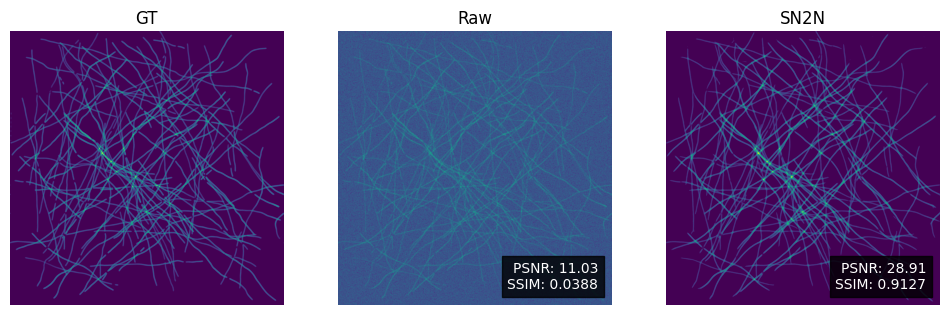

In [3]:
import tifffile
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import structural_similarity as compare_ssim

def add_psnr_ssim_labels(ax, psnr, ssim):
    text = f"PSNR: {psnr:.2f}\nSSIM: {ssim:.4f}"
    ax.text(0.95, 0.05, text, color='white', transform=ax.transAxes,
            fontsize=10, ha='right', va='bottom', bbox=dict(facecolor='black', alpha=0.8))

raw = tifffile.imread('C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/imgs/levelONE_1.tif')
GT = tifffile.imread('C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/imgs/gt.tif')
SN2N = tifffile.imread('C:/Users/qqq/Desktop/SN2N-V0.29/examples/denoising2D/imgs/epoch_49_.tif')

raw_psnr_value = compare_psnr(GT, raw)
raw_ssim_value, _ = compare_ssim(GT, raw, full=True)

sn2n_psnr_value = compare_psnr(GT, SN2N)
sn2n_ssim_value, _ = compare_ssim(GT, SN2N, full=True)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(GT, cmap='viridis')
axs[0].set_title('GT')
axs[0].axis('off')

axs[1].imshow(raw, cmap='viridis')
axs[1].set_title('Raw')
axs[1].axis('off')
add_psnr_ssim_labels(axs[1], raw_psnr_value, raw_ssim_value)

axs[2].imshow(SN2N, cmap='viridis')
axs[2].set_title('SN2N')
axs[2].axis('off')
add_psnr_ssim_labels(axs[2], sn2n_psnr_value, sn2n_ssim_value)

plt.show()